# 1. Problem Statement

# 2. Hypothesis Generation

# 3. Prepare Data

In [901]:
# Importing the libraries
import numpy as np
import pandas as pd

In [902]:
# Importing the dataset
df = pd.read_csv('../../data/raw_data.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Understanding each feature

- **Loan_ID**: Identification (Primary Key) of each applicant
- **Gender**: Applicant's gender
- **Married**: Applicant's marital status (Is the applicant married or not?)
- **Dependents**: The amount of people that are dependant of the applicant (eg. Children)
- **Education**: Applicant's education level
- **Self_Employed**: Applicant's type of employment (Do they work for themselves)
- **ApplicantIncome**: Applicant's income
- **CoapplicantIncome**: The co-applicant's income
- **LoanAmount**: The amount that the applicant wants to loan
- **Loan_Amount_Term**: The term for which the loan will be payed back
- **Credit_History**: Applicant's credit history
- **Property_Area**: The type of area in which the applicant wants to buy a home
- **Loan_Status**: This indicated whether the applicant is approved for the home loan or not

In [903]:
# Remove irrelevant columns
df.drop(columns='Loan_ID', inplace=True)

# 4. Exploratory Data Analysis (EDA)

## i) Univariate Analysis

### Displaying the data

In [904]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
190,Male,No,0,Not Graduate,No,4885,0.0,48.0,360.0,1.0,Rural,Y
241,Male,Yes,1,Not Graduate,No,2510,1983.0,140.0,180.0,1.0,Urban,N
259,Male,Yes,3+,Not Graduate,No,4931,0.0,128.0,360.0,NaN,Semiurban,N
571,Male,Yes,NaN,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban,N
411,Male,Yes,0,Graduate,NaN,6256,0.0,160.0,360.0,NaN,Urban,Y


#### Check dimensions of the dataframe

In [905]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Visualizing categorical and numerical columns separately

#### Import necessary libraries

In [906]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#### Categorical Visualization

In [907]:
fig = px.box(
    data_frame= df, 
    x='ApplicantIncome', 
    orientation='h',
    title='Boxplot of the Target (Applicant_Income) - With Outliers'
)

fig.update_layout(xaxis_title='Target')
fig.show()

<Axes: xlabel='Credit_History', ylabel='count'>

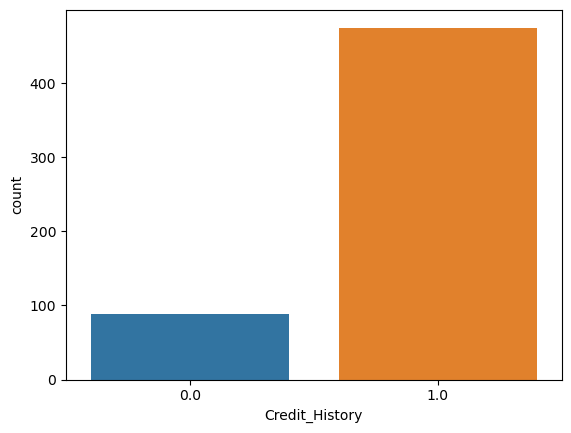

In [908]:
sns.countplot(x='Credit_History', data=df)

#### Comparing Yes and No Loan Statuses for Categorical Imbalances

In [909]:
labels = (
    df['Loan_Status']
    .astype('str')
    .str.replace('0','No', regex=True)
    .str.replace('1','Yes', regex=True)
    .value_counts()
)

fig = px.bar(
    data_frame=labels, 
    x=labels.index, 
    y=labels.values, 
    title=f'Class Imbalance', 
    color=labels.index
)

fig.update_layout(xaxis_title='Loan Status', yaxis_title='Number of Loan Applicants')
fig.show()

## ii) Bivariate Analysis

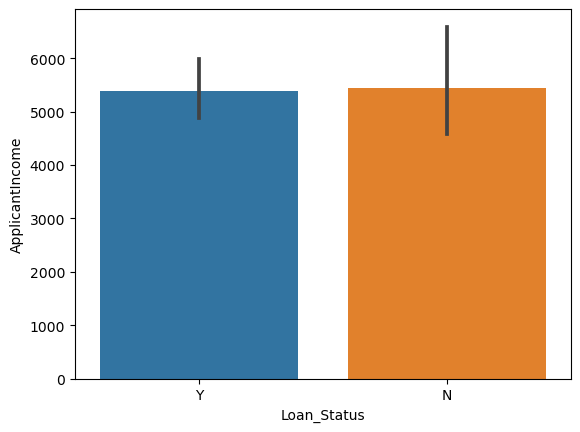

In [910]:

# 1. applicant income and loan status numerical and categorical



sns.barplot(x = 'Loan_Status' , y='ApplicantIncome' , data=df )
plt.show()


# 2 .Education and loan status 
# pd.crosstab(loan_data['Education'] , loan_data['Loan_Status'])

# sns.heatmap(pd.crosstab(loan_data['Education'] , loan_data['Loan_Status']))

# 3. loan_amount and loan_amount_term

#sns.scatterplot( x = 'LoanAmount' , y = 'Loan_Amount_Term' , data=loan_data )

# 4 .  self-employmed and loan status

#pd.crosstab(loan_data['Self_Employed'] , loan_data['Loan_Status'])
#sns.heatmap(pd.crosstab(loan_data['Self_Employed'] , loan_data['Loan_Status']))

# 5 . Applicant income and loan amount

#sns.scatterplot( x = 'ApplicantIncome' , y = 'LoanAmount' , data=loan_data )

# 6 . Dependents and loan amount

#sns.scatterplot( x = 'Dependents' , y = 'LoanAmount' , data = loan_data)

# 7 . Gender and loan status

#pd.crosstab(loan_data['Gender'] , loan_data['Loan_Status'])
#sns.heatmap(pd.crosstab(loan_data['Gender'] , loan_data['Loan_Status']))

# 8 Married and loan status

#pd.crosstab(loan_data['Married'] , loan_data['Loan_Status'])
#sns.heatmap(pd.crosstab(loan_data['Married'] , loan_data['Loan_Status']))

# 9 Credit history and loan status

#pd.crosstab(loan_data['Credit_History'] , loan_data['Loan_Status'])
#sns.heatmap(pd.crosstab(loan_data['Credit_History'] , loan_data['Loan_Status']))

# 10 

# 5. Preprocess Data

## Analyze the data

In [911]:
import skimpy as sk
sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ ApplicantIncome        │   0 │      0 │   5400 │   6100 │  150 │   2900 │  3800 │  5800 │  81000 │    ▇    │  │
│ │ CoapplicantIncome      │   0 │      0 │   1600 │   2900 │    0 │      0 │  1200 │  2300 │  42000 │    ▇    │  │
│ │ LoanAmount             │  22 │   3.58 │    150 │     86 │    9 │    100 │   130 │   170 │    700 │   ▇▇▁   │  │
│ │ Loan_Amount_Term       │  14 │   2.28 │    340 │     65 │   12 │    360 │   360 │   360 │    480 │    ▁ ▇  │  │
│ │ Credit_History         │  50 │   8.14 │   0.84 │   0.36 │    0 │      1 │     1 │     1 │      1 │ ▁    ▇  │  │
│ └────────────────────────┴─────┴────────┴────────┴────────┴──────┴────────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                       │     13 │       2.12 │                        0.98 │                     601 │  │
│ │ Married                      │      3 │       0.49 │                           1 │                     611 │  │
│ │ Dependents                   │     15 │       2.44 │                        0.98 │                     599 │  │
│ │ Education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ Self_Employed                │     32 │       5.21 │                        0.95 │                     582 │  │
│ │ Property_Area                │      0 │          0 │                           1 │                     614 │  │
│ │ Loan_Status                  │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Handling incomplete applications

In [912]:
# Remove rows with missing values
df.dropna(subset=['Gender', 'Dependents', 'LoanAmount', 'Loan_Amount_Term'], inplace=True)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    object 
 1   Married            553 non-null    object 
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    object 
 4   Self_Employed      523 non-null    object 
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     505 non-null    float64
 10  Property_Area      553 non-null    object 
 11  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 56.2+ KB
None


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


## Handling duplicate values

In [913]:
print(df.duplicated().value_counts())
df.drop_duplicates()

False    553
Name: count, dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Handling high and low cardinality features

In [914]:
# checking the cardinality of features
df.select_dtypes("object").nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

## Handling empty cells

In [915]:
(df.isnull().sum()/len(df)*100).round(4)

Gender               0.0000
Married              0.0000
Dependents           0.0000
Education            0.0000
Self_Employed        5.4250
ApplicantIncome      0.0000
CoapplicantIncome    0.0000
LoanAmount           0.0000
Loan_Amount_Term     0.0000
Credit_History       8.6799
Property_Area        0.0000
Loan_Status          0.0000
dtype: float64

### Fill categorical value(s)

In [916]:
# Fill categorical value(s)
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

(df.isnull().sum()/len(df)*100).round(4)

Gender               0.0000
Married              0.0000
Dependents           0.0000
Education            0.0000
Self_Employed        0.0000
ApplicantIncome      0.0000
CoapplicantIncome    0.0000
LoanAmount           0.0000
Loan_Amount_Term     0.0000
Credit_History       8.6799
Property_Area        0.0000
Loan_Status          0.0000
dtype: float64

### Fill numerical value(s)

In [917]:
# Fill numerical value(s)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

(df.isnull().sum()/len(df)*100).round(4)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

## Outlier Treatment

### Visualize the outliers of the numerical features

In [918]:
# Plot / Visualize the outliers of the numerical features
import matplotlib.pyplot as plt
import plotly.express as px

for col in df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]:
    fig = px.box(
        data_frame=df, 
        x=col,
        orientation='h',
        title=f'Boxplot of the Target ({col}) - With Outliers'
    )
    fig.show()

### Handling outliers

In [919]:
# Create a mask to filter out the outliers for 'ApplicantIncome'
mask_ApplicantIncome = df['ApplicantIncome'] <= 7441

print(df[mask_ApplicantIncome].head())
print(df[mask_ApplicantIncome].info())

fig = px.box(
    data_frame=df[mask_ApplicantIncome], 
    x='ApplicantIncome', 
    orientation='h',
    title='Boxplot of the Target (ApplicantIncome) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4 

In [920]:
# Create a mask to filter out the outliers for 'CoapplicantIncome'
mask_CoapplicantIncome = df['CoapplicantIncome'] <= 5302

print(df[mask_CoapplicantIncome].head())
print(df[mask_CoapplicantIncome].info())

fig = px.box(
    data_frame=df[mask_CoapplicantIncome], 
    x='CoapplicantIncome', 
    orientation='h',
    title='Boxplot of the Target (CoapplicantIncome) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4 

In [921]:
# Create a mask to filter out the outliers for 'LoanAmount'
mask_LoanAmount1 = df['LoanAmount'] >= 25
mask_LoanAmount2 = df['LoanAmount'] <= 230

print(df[mask_LoanAmount1].head())
print(df[mask_LoanAmount2].info())

fig = px.box(
    data_frame=df[mask_LoanAmount1 & mask_LoanAmount2], 
    x='LoanAmount', 
    orientation='h',
    title='Boxplot of the Target (LoanAmount) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4 

In [922]:
# Create a mask to filter out the outliers for 'LoanAmount'
mask_Loan_Amount_Term = df['Loan_Amount_Term'] == 360

print(df[mask_Loan_Amount_Term].head())
print(df[mask_Loan_Amount_Term].info())

fig = px.box(
    data_frame=df[mask_Loan_Amount_Term], 
    x='Loan_Amount_Term', 
    orientation='h',
    title='Boxplot of the Target (Loan_Amount_Term) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4 

### Filtering out the outliers

In [923]:
df = df[mask_ApplicantIncome & mask_CoapplicantIncome & mask_LoanAmount1 & mask_LoanAmount2 & mask_Loan_Amount_Term]

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             371 non-null    object 
 1   Married            371 non-null    object 
 2   Dependents         371 non-null    object 
 3   Education          371 non-null    object 
 4   Self_Employed      371 non-null    object 
 5   ApplicantIncome    371 non-null    int64  
 6   CoapplicantIncome  371 non-null    float64
 7   LoanAmount         371 non-null    float64
 8   Loan_Amount_Term   371 non-null    float64
 9   Credit_History     371 non-null    float64
 10  Property_Area      371 non-null    object 
 11  Loan_Status        371 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 37.7+ KB
None


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


## Scaling

In [924]:
df['Loan_Status'] = df['Loan_Status'].map({'Y' : 1, 'N' : 0}).astype('int')

# 7. Modeling

## Split Data

In [925]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Loan_Status'], inplace=False)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## **Model and Predict**

In [926]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_dt = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    DecisionTreeClassifier()) # build model

model_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    RandomForestClassifier()) # build model

model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    LogisticRegression()) # build model

# fit the model
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Married', 'Dependents',
                                     'Education', 'Self_Employed',
                                     'Property_Area'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [927]:
from sklearn.metrics import accuracy_score

y_pred = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", (accuracy*100).__round__(4))

y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier:", (accuracy*100).__round__(4))

y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression:", (accuracy*100).__round__(4))

Decision Tree Accuracy: 72.0
Random Forest Classifier: 82.6667
Logistic Regression: 86.6667


## **Evaluate**

In [928]:
from sklearn.metrics import mean_absolute_error

# Decision Tree
# Predict the train data
y_pred_training = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

# Random Forest Regressor
# Predict the train data
y_pred_training = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

# Logistic Regression
# Predict the train data
y_pred_training = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

Training MAE: 0.0
Test data MAE: 0.28
Training MAE: 0.0
Test data MAE: 0.17
Training MAE: 0.18
Test data MAE: 0.13


In [935]:
def make_prediction(row):

    # data = {
    #     "Gender": row['Gender'],
    #     "Married": row['Married'],
    #     "Dependents": row['Dependents'],
    #     "Education": row['Education'],
    #     "Self_Employed": row['Self_Employed'],
    #     "ApplicantIncome": row['ApplicantIncome'],
    #     "CoapplicantIncome": row['CoapplicantIncome'],
    #     "LoanAmount": row['LoanAmount'],
    #     "Loan_Amount_Term": row['Loan_Amount_Term'],
    #     "Credit_History": row['Credit_History'],
    #     "Property_Area": row['Property_Area']
    # }

    data = {
        "Gender": row[1],
        "Married": row[2],
        "Dependents": row[3],
        "Education": row[4],
        "Self_Employed": row[5],
        "ApplicantIncome": row[6],
        "CoapplicantIncome": row[7],
        "LoanAmount": row[8],
        "Loan_Amount_Term": row[9],
        "Credit_History": row[10],
        "Property_Area": row[11]
    }

    df_predict = pd.DataFrame(data, index=[0])
    prediction_dt = model_dt.predict(df_predict)[0]
    prediction_rf = model_rf.predict(df_predict)[0]
    prediction_lr = model_lr.predict(df_predict)[0]
    return f"Decision Tree: {prediction_dt}; Random Forest: {prediction_rf} Logistic Regression: {prediction_lr}"

In [937]:
print(make_prediction(pd.Series(['dfgd', 'Male', 'Yes', '1', 'Graduate', 'No', 4583, 1508.0, 128.0, 360.0, 1.0, 'Rural']))) # Should output 1
print(make_prediction(pd.Series(['dfgd', 'Male', 'No', '0', 'Graduate', 'No', 6000, 0.0, 141.0, 360.0, 1.0, 'Urban']))) # Should output 1
print(make_prediction(pd.Series(['dfgd', 'Female', 'No', '4', 'Not Graduate', 'Yes', 200, 0.0, 1000.0, 360.0, 0.0, 'Rural']))) # Should output 0


Decision Tree: 0; Random Forest: 0 Logistic Regression: 1
Decision Tree: 1; Random Forest: 1 Logistic Regression: 1
Decision Tree: 0; Random Forest: 0 Logistic Regression: 0


In [ ]:
df_val = pd.read_csv("../../data/validation.csv")

for i in range(0, 2):#df_val.shape[0]):
    row = df_val.iloc[i]
    print(make_prediction(row))


Decision Tree: 1; Random Forest: 1 Logistic Regression: 1
Decision Tree: 1; Random Forest: 1 Logistic Regression: 1


# 8. Feature Engineering

In [ ]:
# Feature Engineering
df = df.copy()
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 1 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            371 non-null    object 
 1   Married           371 non-null    object 
 2   Dependents        371 non-null    object 
 3   Education         371 non-null    object 
 4   Self_Employed     371 non-null    object 
 5   LoanAmount        371 non-null    float64
 6   Loan_Amount_Term  371 non-null    float64
 7   Credit_History    371 non-null    float64
 8   Property_Area     371 non-null    object 
 9   Loan_Status       371 non-null    int32  
 10  Income            371 non-null    float64
dtypes: float64(4), int32(1), object(6)
memory usage: 33.3+ KB
None


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,1,6000.0
6,Male,Yes,0,Not Graduate,No,95.0,360.0,1.0,Urban,1,3849.0


# 9. Modeling (With Feature Engineering)

## **Split Data**

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Loan_Status'], inplace=False)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## **Model and Predict**

In [ ]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_dt = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    DecisionTreeClassifier()) # build model

model_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    RandomForestClassifier()) # build model

model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    LogisticRegression()) # build model

# fit the model
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Married', 'Dependents',
                                     'Education', 'Self_Employed',
                                     'Property_Area'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## **Evaluate**

In [ ]:
from sklearn.metrics import mean_absolute_error

# Decision Tree
# Predict the train data
y_pred_training = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

# Random Forest Regressor
# Predict the train data
y_pred_training = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

# Logistic Regression
# Predict the train data
y_pred_training = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

Training MAE: 0.0
Test data MAE: 0.2
Training MAE: 0.0
Test data MAE: 0.2
Training MAE: 0.18
Test data MAE: 0.13


In [948]:
def make_prediction(row):

    # data = {
    #     "Gender": row['Gender'],
    #     "Married": row['Married'],
    #     "Dependents": row['Dependents'],
    #     "Education": row['Education'],
    #     "Self_Employed": row['Self_Employed'],
    #     "LoanAmount": row['LoanAmount'],
    #     "Loan_Amount_Term": row['Loan_Amount_Term'],
    #     "Credit_History": row['Credit_History'],
    #     "Property_Area": row['Property_Area'],
    #     "Income": row['Income']
    # }

    data = {
        "Gender": row[1],
        "Married": row[2],
        "Dependents": row[3],
        "Education": row[4],
        "Self_Employed": row[5],
        "LoanAmount": row[6],
        "Loan_Amount_Term": row[7],
        "Credit_History": row[8],
        "Property_Area": row[9],
        "Income": row[11]
    }

    df_predict = pd.DataFrame(data, index=[0])
    prediction_dt = model_dt.predict(df_predict)[0]
    prediction_rf = model_rf.predict(df_predict)[0]
    prediction_lr = model_lr.predict(df_predict)[0]
    return f"Decision Tree: {prediction_dt}; Random Forest: {prediction_rf} Logistic Regression: {prediction_lr}"

In [949]:
print(make_prediction(pd.Series(['dfgd', 'Male', 'Yes', '1', 'Graduate', 'No', 128.0, 360.0, 1.0, 'Rural', '', (4583 + 1508)], ''))) # Should output 1
print(make_prediction(pd.Series(['dfgd', 'Male', 'No', '0', 'Graduate', 'No', 6000, 0.0, 141.0, 360.0, 1.0, 'Urban']))) # Should output 1
print(make_prediction(pd.Series(['dfgd', 'Female', 'No', '4', 'Not Graduate', 'Yes', 200, 0.0, 1000.0, 360.0, 0.0, 'Rural']))) # Should output 0

TypeError: Index(...) must be called with a collection of some kind, '' was passed

In [ ]:
df_val = pd.read_csv("../../data/validation.csv")

for i in range(0, 2):#df_val.shape[0]):
    row = df_val.iloc[i]
    print(make_prediction(row))


KeyError: 'Income'